# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [1]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [4]:
ruta = "./insurance.csv"
insurance_data = pd.read_csv(ruta)

In [5]:
data_head = insurance_data.head()
data_info = insurance_data.info()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 None)

# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

### EDA:

/var/folders/b8/71_vxr610ynctg8pm_w75qnr0000gn/T/ipykernel_18255/820694046.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=insurance_data, ax=axes[1, 0], palette='viridis')
/var/folders/b8/71_vxr610ynctg8pm_w75qnr0000gn/T/ipykernel_18255/820694046.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=insurance_data, ax=axes[1, 1], palette='coolwarm')


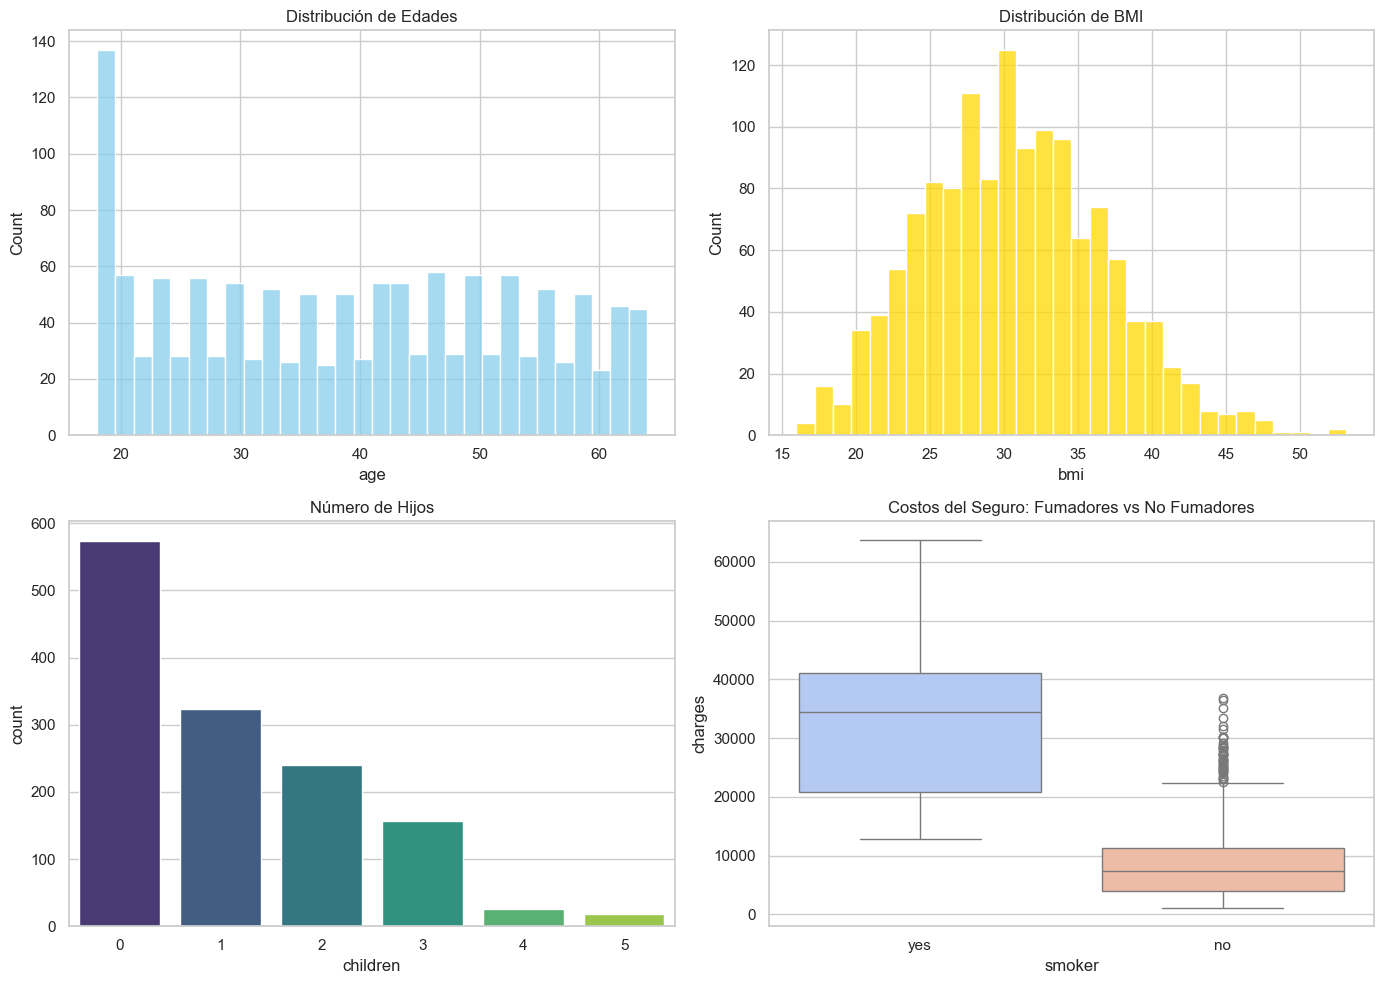

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos
sns.set(style="whitegrid")

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Histograma de edades
sns.histplot(insurance_data['age'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de Edades')

# Histograma de BMI
sns.histplot(insurance_data['bmi'], bins=30, ax=axes[0, 1], color='gold')
axes[0, 1].set_title('Distribución de BMI')

# Gráfico de barras para el número de hijos
sns.countplot(x='children', data=insurance_data, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Número de Hijos')

# Boxplot de costos del seguro por fumador vs no fumador
sns.boxplot(x='smoker', y='charges', data=insurance_data, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Costos del Seguro: Fumadores vs No Fumadores')

plt.tight_layout()
plt.show()


Distribución de Edades: La distribución de las edades parece relativamente uniforme, lo que indica una buena mezcla de clientes de diferentes edades.

Distribución de BMI (Índice de Masa Corporal): La mayoría de los valores de BMI están en el rango de 20 a 40, con un pico alrededor de 30. Esto sugiere que la mayoría de los clientes tienen un BMI considerado en el rango de sobrepeso.

Número de Hijos: La mayoría de los clientes no tienen hijos o tienen uno o dos hijos. Esto es útil para entender la configuración familiar de la base de clientes.

Costo de Seguro para fumadores muestra un incremento importante respecto a los No fumadores.

## Implementación

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir las columnas categóricas y numéricas
categorical_columns = ['sex', 'smoker', 'region']
numeric_columns = ['age', 'bmi', 'children']

# Crear el transformador de columnas utilizando OneHotEncoder para las categóricas y StandardScaler para las numéricas
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numeric_columns)
    ])

# Crear el pipeline con el transformador de columnas
pipeline = Pipeline(steps=[('preprocessor', column_transformer)])

# Aplicar el pipeline de preprocesamiento y dividir los datos
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']
X_processed = pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape


((1070, 11), (268, 11))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 33641090.03617347
Coeficiente de Determinación (R^2): 0.7833084385751901


#### Arbol de decision

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de árbol de decisiones
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación R^2 para el árbol de decisiones
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Árbol de Decisiones - Error Cuadrático Medio (MSE):", mse_tree)
print("Árbol de Decisiones - Coeficiente de Determinación (R^2):", r2_tree)


Árbol de Decisiones - Error Cuadrático Medio (MSE): 24296218.452470355
Árbol de Decisiones - Coeficiente de Determinación (R^2): 0.8435013399529272


##### Gridsearch -  para arbol de desicion:

In [10]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros a buscar
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de árbol de decisiones
tree_model = DecisionTreeRegressor(random_state=42)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor score encontrado
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de MSE:", -grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor score de MSE: 23298917.725303005


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Configurar el modelo con los parámetros deseados
tree_model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Imprimir los resultados de las métricas
print("Árbol de Decisiones - Error Cuadrático Medio (MSE):", mse_tree)
print("Árbol de Decisiones - Coeficiente de Determinación (R^2):", r2_tree)


Árbol de Decisiones - Error Cuadrático Medio (MSE): 22812669.852340847
Árbol de Decisiones - Coeficiente de Determinación (R^2): 0.8530572866320028


# Conclusiones

Para el modelo de Arbol de desicion es aproximadamente 0.844, lo que es superior al obtenido en la regresión lineal (0.783). Esto significa que el modelo de árbol de decisiones puede explicar alrededor del 84.4% de la variabilidad en los costos del seguro, un valor bastante alto que indica una buena capacidad predictiva del modelo en comparación con la regresión lineal.